#<div dir="rtl" align=center> unit 5 exercises </div>


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
url_tracks = 'https://s3.eu-west-1.amazonaws.com/data.cyber.org.il/virtual_courses/introdata/colab/spotify_tracks1.csv'
url_artists = 'https://s3.eu-west-1.amazonaws.com/data.cyber.org.il/virtual_courses/introdata/colab/artists.csv'

In [3]:
tracks = pd.read_csv(url_tracks)
artists = pd.read_csv(url_artists)

In [4]:
tracks_artists = pd.merge(left=tracks, right=artists, left_on='id_artists',right_on='id')

In [5]:
metal_yes_no = ['metal' in genre for genre in tracks_artists['genres']]

In [6]:
tracks_artists['is_metal'] = metal_yes_no

1: In this question we will analyze the number of songs each year among each of the genres. The steps we will perform are similar to those required for the average energy analysis:

Start from the tracks_artists table (the consolidated table after the merge)
Perform a groupby by release_year and is_metal
Choose a column and sum it by count
Do reset_index
Separate the data where is_metal=True holds from the data where is_metal=False holds
Draw two graphs: in one the number of songs by year that are not metal songs and in the second the number of songs by year that are metal songs. Note the Y-axis boundaries chosen for each of the graphs. What can be said about the amount of metal songs out of the total amount of songs appearing on spotify?

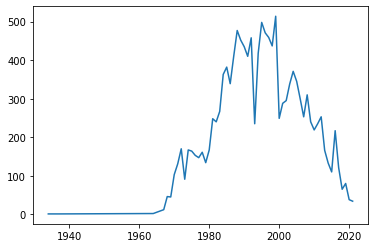

In [7]:
count_by_genre = tracks_artists.groupby(['release_year','is_metal'])['energy'].count().reset_index()
count_metal = count_by_genre.loc[count_by_genre['is_metal']==True , :]
count_nonmetal = count_by_genre.loc[count_by_genre['is_metal']==False , :]

plt.plot(count_metal['release_year'], count_metal['energy'])

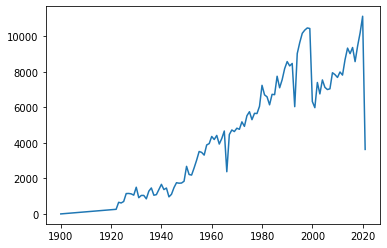

In [8]:
plt.plot(count_nonmetal['release_year'], count_nonmetal['energy']);

2: In this question we will look at the lines identified as metal songs and published before 1967.

Start the tracks_artists table
Filter the table so that only rows are printed where is_metal=True and whose publication year is up to 1967. The filter will include all columns. How many lines did you get?
Copy the code with which you performed the filtering, and update it so that only the following columns are printed: the name of the song, the name of the performing artist, the year of publication and the genres.
Check whether the printed songs are really metal songs, and if so, whether their publication year matches the year that appears in the release_year column. Use Wikipedia for this. Locate the names of the bands that appear as the performers of the songs: Dragged into Sunlight, System of A Down and other bands, and check the years in which these bands were active. Does the song's release year as it appears on spotify match the band's years of activity? What will you conclude about the data in the release_year column?

In [14]:
tracks_artists.loc[
    (tracks_artists['release_year']<1967) &
    (tracks_artists['is_metal']==True),
['name_x','artists','release_year','genres']]

,name_x,artists,release_year,genres
29543,Plainfield / Monarch of Scum,Dragged Into Sunlight,1934,"['autonomous black metal', 'british black meta..."
40604,The Tempest - Op. 109: Berceuse,Sibelius & Philadelphia Orchestra & Leopold St...,1937,['venezuelan metal']
172908,Crazy Train - 2002 Version,Ozzy Osbourne,1964,"['album rock', 'birmingham metal', 'hard rock'..."
245344,Snowblind,System Of A Down,1964,"['alternative metal', 'nu metal', 'rap metal']"
